<a href="https://colab.research.google.com/github/TonnBH/APPML_Projects/blob/main/Iris_Species_Classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Species Classsification**

##Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

##Import Datasets

In [2]:
from google.colab import files

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML_Projects/Iris Classification/Datasets/Iris.csv')

## Checking Missing Files

In [4]:
data['Species'] = data['Species'].astype ('category')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
print(data.Species.nunique())
print(data.Species.unique())

3
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


##Visualization of Species

In [8]:
#sns.pairplot(data, hue='Species')

In [9]:
print(data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


Text(0.5, 1.0, 'Lenth Of Sepal (In Centimeters) Group by Species')

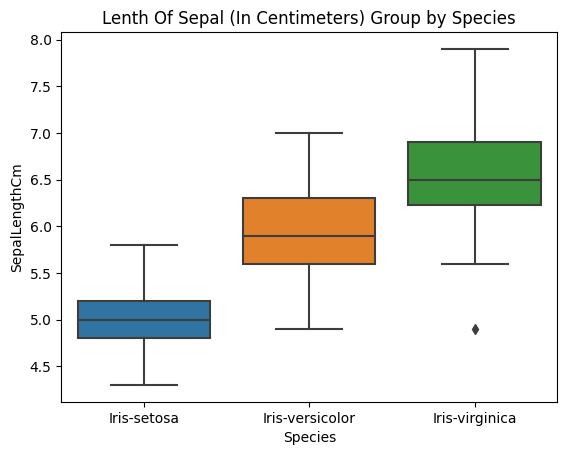

In [10]:
sns.boxplot(data, x='Species', y='SepalLengthCm').set_title('Lenth Of Sepal (In Centimeters) Group by Species')

Text(0.5, 1.0, 'Lenth Of Sepal (In Centimeters) Group by Species')

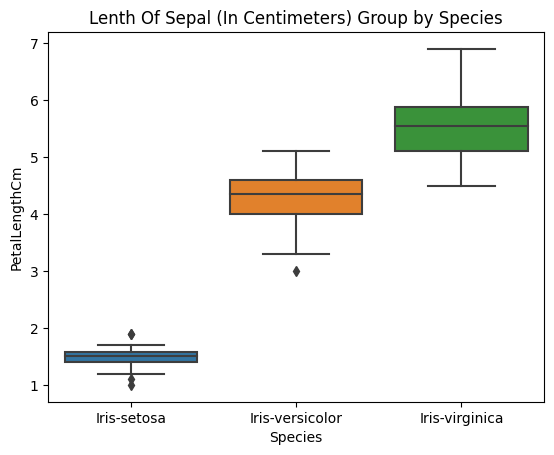

In [11]:
sns.boxplot(data, x='Species', y='PetalLengthCm').set_title('Lenth Of Sepal (In Centimeters) Group by Species')

Text(0.5, 1.0, 'Lenth Of Sepal (In Centimeters) Group by Species')

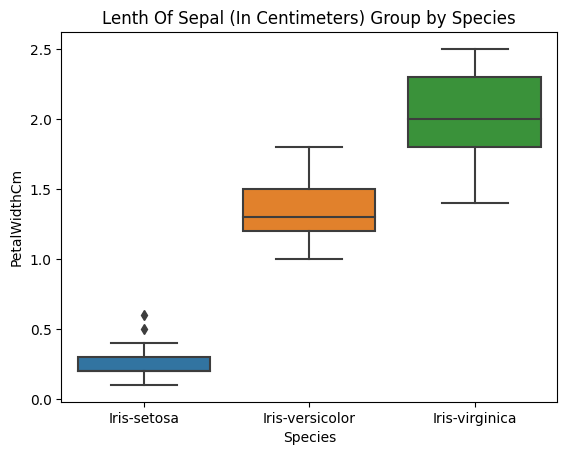

In [12]:
sns.boxplot(data, x='Species', y='PetalWidthCm').set_title('Lenth Of Sepal (In Centimeters) Group by Species')

##Data Processing

In [13]:
print(data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [14]:
x= data[['PetalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y= data['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [15]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

##Random Forest Classifier

In [17]:
clf = RandomForestClassifier(max_depth=2,random_state=42)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [19]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 0,  9]],

       [[19,  0],
        [ 0, 11]]])

In [20]:
accuracy_score(y_test,y_pred, normalize=False)

30

In [21]:
accuracy_score(y_test,y_pred, normalize=True)

1.0

In [22]:
zero_one_loss(y_test, y_pred, normalize=False)

0

##Suport Vector Classifier

In [23]:
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)

print('Model Accuracy: ', clf.score(x_train, y_train))
print('Number of Correctly Classifier Sample: ', accuracy_score(y_test, y_pred, normalize=False), 'Out Of', len(y_pred))
print('Number of Support Vectors for each Class: ', clf.n_support_)

Model Accuracy:  0.9583333333333334
Number of Correctly Classifier Sample:  30 Out Of 30
Number of Support Vectors for each Class:  [ 4 15 16]
